### ChatOpenAI 주요 매개변수와 출력

- temperature : 샘플링 온도, 답변을 얼마나 창의적으로 할 것인지    
  높을수록 무작위한 출력, 낮을수록 더 집중되고 정확한 답변
- max_tokens : 최대 토큰 수
- model_name : 적용 가능한 모델 리스트

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

True

##### LangSmith 추적 설정
- langsmith 비활성화 : `langsmith("ChatOpenAI_LLM", set_enable=False)`
- langsmith 활성화 : `langsmith("ChatOpenAI_LLM", set_enable=True)`

In [2]:
def langsmith(project_name=None, set_enable=True):

    if set_enable:
        langchain_key = os.environ.get("LANGCHAIN_API_KEY", "")
        langsmith_key = os.environ.get("LANGSMITH_API_KEY", "")

        # 더 긴 API 키 선택
        if len(langchain_key.strip()) >= len(langsmith_key.strip()):
            result = langchain_key
        else:
            result = langsmith_key

        if result.strip() == "":
            print(
                "LangChain/LangSmith API Key가 설정되지 않았습니다."
            )
            return

        os.environ["LANGSMITH_ENDPOINT"] = (
            "https://api.smith.langchain.com"  # LangSmith API 엔드포인트
        )
        os.environ["LANGSMITH_TRACING"] = "true"  # true: 활성화
        os.environ["LANGSMITH_PROJECT"] = project_name  # 프로젝트명
        print(f"LangSmith 추적을 시작합니다.\n[프로젝트명]\n{project_name}")
    else:
        os.environ["LANGSMITH_TRACING"] = "false"  # false: 비활성화
        print("LangSmith 추적을 하지 않습니다.")

In [ ]:
# langsmith("ChatOpenAI_LLM")

LangSmith 추적을 시작합니다.
[프로젝트명]
ChatOpenAI_LLM


#### `invoke()` 함수로 응답 출력

In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    temperature=0.1,
    model_name="gpt-4o-mini",
)

In [4]:
question = "대한민국의 수도는 어디인가요?"

# print(f"[답변]: {llm.invoke(question)}")
response = llm.invoke(question)
response

Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST http://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('405 Client Error: Method Not Allowed for url: https://api.smith.langchain.com:443/runs/multipart', '')


AIMessage(content='대한민국의 수도는 서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 16, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-COerdk3jJW3qiNvImYVg7mnSoWJ97', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--befb12ba-6049-4334-b216-78d2f8acb468-0', usage_metadata={'input_tokens': 16, 'output_tokens': 8, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST http://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('405 Client Error: Method Not Allowed for url: https://api.smith.langchain.com:443/runs/multipart', '')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST http://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('405 Client Error: Method Not Allowed for url: https://api.smith.langchain.com:443/runs/multipart', '')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST http://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('405 Client Error: Method Not Allowed for url: https://api.smith.langchain.com:443/runs/multipart', '')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST http://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('405 Client Error: Method No

In [5]:
# 응답 텍스트만 출력
response.content

'대한민국의 수도는 서울입니다.'

In [6]:
# 메타데이터만 출력
response.response_metadata

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 16,
  'total_tokens': 24,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_560af6e559',
 'id': 'chatcmpl-COerdk3jJW3qiNvImYVg7mnSoWJ97',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

#### logprob 활성화
- 주어진 GPT 모델의 토큰 확률 로그값
- 모델이 토큰을 예측할 확률
- 0에 가까울수록 확률이 높다는 뜻, 확률이 낮을수록 음수로 나타남

In [7]:
llm_with_logprob = ChatOpenAI(
    temperature=0.1,
    max_tokens=2048,
    model_name="gpt-4o-mini",
).bind(logprobs=True)

In [8]:
response = llm_with_logprob.invoke(question)
response.response_metadata

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 16,
  'total_tokens': 24,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_51db84afab',
 'id': 'chatcmpl-COereF9Id47DxGZ8ZmIVPKn7yreHT',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '대한',
    'bytes': [235, 140, 128, 237, 149, 156],
    'logprob': -3.845798710244708e-05,
    'top_logprobs': []},
   {'token': '민국',
    'bytes': [235, 175, 188, 234, 181, 173],
    'logprob': -6.704273118884885e-07,
    'top_logprobs': []},
   {'token': '의',
    'bytes': [236, 157, 152],
    'logprob': -2.7968066206085496e-05,
    'top_logprobs': []},
   {'token': ' 수도',
    'bytes': [32, 236, 136, 152, 235, 143, 132],
    'logprob': -3.976922744186595e-05,
    'top_lo

In [9]:
llm_with_logprob = ChatOpenAI(
    temperature=0.1,
    max_tokens=2048,
    model_name="gpt-4o-mini",
).bind(logprobs=True, top_logprobs=5) # top_logprobs : 다른 후보 토큰들의 확률 분포 

response = llm_with_logprob.invoke(question)
response.response_metadata

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 16,
  'total_tokens': 24,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_560af6e559',
 'id': 'chatcmpl-COergaWgjm0KYjUQL64suxpWwafSr',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '대한',
    'bytes': [235, 140, 128, 237, 149, 156],
    'logprob': -3.762356209335849e-05,
    'top_logprobs': [{'token': '대한',
      'bytes': [235, 140, 128, 237, 149, 156],
      'logprob': -3.762356209335849e-05},
     {'token': ' 대한민국',
      'bytes': [32,
       235,
       140,
       128,
       237,
       149,
       156,
       235,
       175,
       188,
       234,
       181,
       173],
      'logprob': -10.37503719329834},
     {'token': '대', 'bytes': [23

#### `stream()` 함수로 스트리밍 출력하기
전체 응답이 완성된 뒤에 한번에 출력하지 않고 하나의 토큰 단위로 출력해주는 기능

In [10]:
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")

for token in answer:
    print(token.content, end='', flush=True) # flush=True : 버퍼링 없이 바로바로 출력

대한민국에는 아름다운 관광지가 많이 있습니다. 아래는 추천하는 10곳과 그 주소입니다.

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **제주도**
   - 주소: 제주특별자치도 제주시

3. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 해운대해변로 264

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **남이섬**
   - 주소: 강원도 춘천시 남이섬길 1

6. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

7. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 173

8. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 하회리

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **광주 무등산 국립공원**
    - 주소: 광주광역시 동구 무등로 100

각 관광지는 독특한 매력을 가지고 있으며, 방문 시 다양한 문화와 자연을 경험할 수 있습니다.

In [11]:
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")

final_answer = ""
for token in answer:
    final_answer += token.content 
print(final_answer)

대한민국에는 아름다운 관광지가 많이 있습니다. 아래는 추천하는 10곳과 그 주소입니다.

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **제주도**
   - 주소: 제주특별자치도 제주시

3. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 해운대해변로 264

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **남이섬**
   - 주소: 강원도 춘천시 남이섬길 1

6. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

7. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 173

8. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 하회리

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **광주 무등산**
    - 주소: 광주광역시 동구 무등산로 100

각 관광지는 고유의 매력을 가지고 있으며, 방문 시 다양한 문화와 자연을 경험할 수 있습니다.


### 멀티모달 기능 활용

In [12]:
import requests
import base64
from IPython.display import Image

from langchain_core.messages import AIMessageChunk

In [13]:
# 이미지를 Base64로 인코딩하고 LLM에 입력하는 클래스
class MultiModal:
    def __init__(self, model, system_prompt=None, user_prompt=None):
        self.model = model
        self.system_prompt = system_prompt
        self.user_prompt = user_prompt
        self.init_prompt()

    # system, user 프롬프트 초기화
    def init_prompt(self):
        if self.system_prompt is None:
            self.system_prompt = "You are a helpful assistant on parsing images."
        if self.user_prompt is None:
            self.user_prompt = "Explain the given images in-depth in Korean."

    # 이미지 url을 받아 Base64 문자열로 인코딩  
    def encode_image_from_url(self, url):
        response = requests.get(url) # 이미지 다운로드
        if response.status_code == 200:
            image_content = response.content
            if url.lower().endswith((".jpg", ".jpeg")):
                mime_type = "image/jpeg"
            elif url.lower().endswith(".png"):
                mime_type = "image/png"
            else:
                mime_type = "image/unknown"
            return f"data:{mime_type};base64,{base64.b64encode(image_content).decode('utf-8')}"
        else:
            raise Exception("Failed to download image")

    # 로컬 이미지 파일을 Base64 문자열로 인코딩
    def encode_image_from_file(self, file_path):
        with open(file_path, "rb") as image_file:
            image_content = image_file.read()
            file_ext = os.path.splitext(file_path)[1].lower()
            if file_ext in [".jpg", ".jpeg"]:
                mime_type = "image/jpeg"
            elif file_ext == ".png":
                mime_type = "image/png"
            else:
                mime_type = "image/unknown"
            return f"data:{mime_type};base64,{base64.b64encode(image_content).decode('utf-8')}"

    # 이미지 경로에 따라 적절한 함수를 호출하는 함수
    def encode_image(self, image_path):
        if image_path.startswith("http://") or image_path.startswith("https://"):
            return self.encode_image_from_url(image_path)
        else:
            return self.encode_image_from_file(image_path)

    # Jupyter Notebook에서 이미지 표시
    def display_image(self, encoded_image):
        display(Image(url=encoded_image))

    # LLM 입력용 메시지 형식 생성
    def create_messages(self, image_url, system_prompt=None, user_prompt=None, display_image=True):
        encoded_image = self.encode_image(image_url)
        if display_image:
            self.display_image(encoded_image)

        system_prompt = (system_prompt if system_prompt is not None else self.system_prompt)

        user_prompt = user_prompt if user_prompt is not None else self.user_prompt

        # 인코딩된 이미지를 사용하여 다른 처리를 수행할 수 있습니다.
        messages = [
            {
                "role": "system",
                "content": system_prompt,
            },
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": user_prompt,
                    },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"{encoded_image}"},
                    },
                ],
            },
        ]
        return messages

    # 단일 이미지를 모델에 입력하고 응답을 받는 함수
    def invoke(self, image_url, system_prompt=None, user_prompt=None, display_image=True):
        messages = self.create_messages(image_url, system_prompt, user_prompt, display_image)
        response = self.model.invoke(messages)
        return response.content

    # 여러 이미지를 모델에 입력하고 응답을 받는 함수
    def batch(
        self,
        image_urls: list[str],
        system_prompts: list[str] = [],
        user_prompts: list[str] = [],
        display_image=False,
    ):
        messages = []
        for image_url, system_prompt, user_prompt in zip(image_urls, system_prompts, user_prompts):
            message = self.create_messages(image_url, system_prompt, user_prompt, display_image)
            messages.append(message)
        response = self.model.batch(messages)
        return [r.content for r in response]

    # 여러 이미지를 모델에 스트리밍 방식으로 입력하고 응답을 받는 함수
    def stream(self, image_url, system_prompt=None, user_prompt=None, display_image=True):
        messages = self.create_messages(image_url, system_prompt, user_prompt, display_image)
        response = self.model.stream(messages)
        return response

In [14]:
# 모델의 스트리밍 응답을 문자열로 반환하는 함수
def stream_response(response, return_output=False):
    answer = ""
    for token in response:
        if isinstance(token, AIMessageChunk):
            answer += token.content
            print(token.content, end="", flush=True)
        elif isinstance(token, str):
            answer += token
            print(token, end="", flush=True)
    if return_output:
        return answer

In [15]:
llm = ChatOpenAI(
    temperature=0.1,
    model_name="gpt-4o-mini",
)

multimodal_llm = MultiModal(llm)


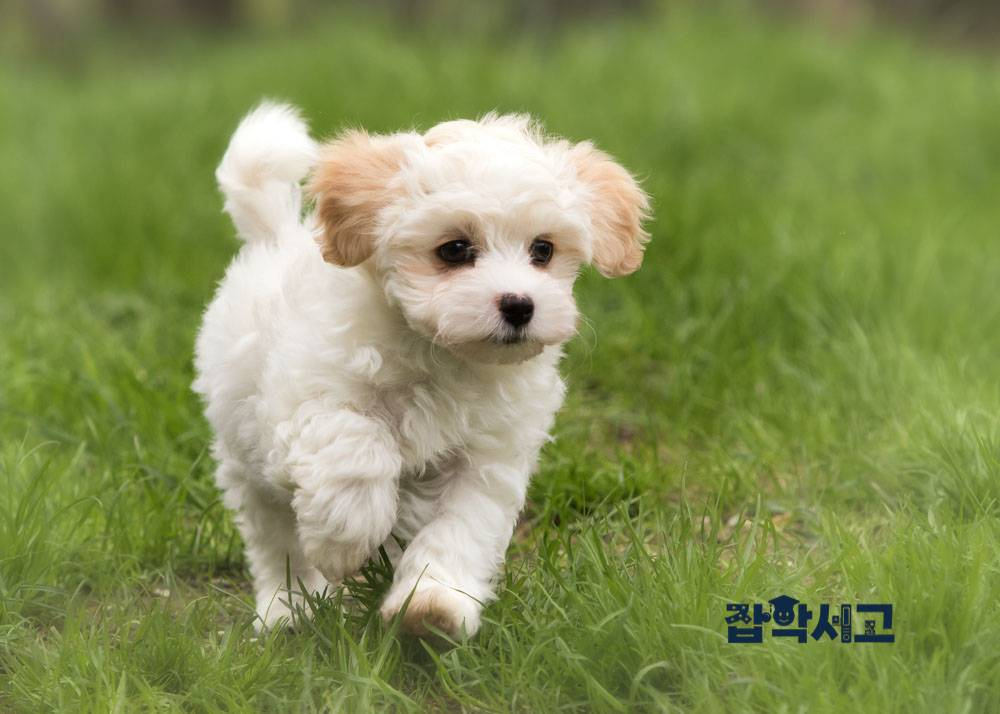

이 이미지는 귀여운 강아지가 잔디밭에서 뛰어다니고 있는 모습입니다. 강아지는 하얀 털로 덮여 있으며, 귀는 약간 갈색이 섞여 있어 더욱 사랑스러운 인상을 줍니다. 

강아지의 눈은 크고 동그랗고, 호기심 가득한 표정을 짓고 있습니다. 이 모습은 강아지가 주변 환경을 탐색하고 있다는 것을 나타냅니다. 잔디밭은 푸르고 싱싱하며, 강아지가 뛰어다니기에 적합한 장소입니다. 

강아지의 자세는 활발하고 에너지가 넘치는 모습으로, 어린 강아지의 특성을 잘 보여줍니다. 이 이미지는 강아지의 순수함과 즐거움을 잘 담고 있으며, 보는 사람에게도 기분 좋은 느낌을 줍니다. 

전반적으로 이 이미지는 강아지의 사랑스러운 모습과 자연의 아름다움을 잘 표현하고 있습니다.

In [16]:
# 샘플 이미지 주소
IMAGE_URL = "https://www.gklibrarykor.com/wp-content/uploads/2024/08/1_%EA%B0%95%EC%95%84%EC%A7%80%EC%9D%98-%EC%8B%A0%EC%B2%B4%EC%A0%81-%ED%8A%B9%EC%A7%95.jpg"

# 이미지 파일로부터 질의
answer = multimodal_llm.stream(IMAGE_URL)
stream_response(answer)


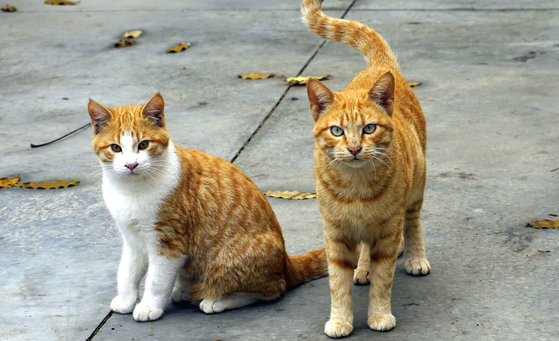

이 이미지는 두 마리의 고양이를 보여줍니다. 두 고양이는 모두 주황색과 흰색의 털을 가지고 있으며, 각각의 모습이 다릅니다. 

왼쪽에 있는 고양이는 흰색 털이 섞인 주황색 털을 가지고 있으며, 귀가 뾰족하고 눈이 크고 동그란 형태입니다. 이 고양이는 앉아 있는 자세로, 약간 긴장한 듯한 표정을 짓고 있습니다. 

오른쪽에 있는 고양이는 더 진한 주황색 털을 가지고 있으며, 털이 더 부드럽고 윤기가 나는 것처럼 보입니다. 이 고양이는 서 있는 자세로, 자신감 있는 표정을 하고 있습니다. 두 고양이 모두 주변 환경에 주의를 기울이고 있는 듯한 모습입니다.

배경은 콘크리트 바닥으로 되어 있으며, 바닥에는 몇 개의 낙엽이 흩어져 있습니다. 이로 인해 고양이들이 있는 장소가 자연과 가까운 곳임을 암시합니다. 전체적으로 두 고양이는 서로 가까이 서 있으며, 서로의 존재를 인식하고 있는 듯한 모습입니다.

In [17]:
IMAGE_PATH = "cats.jpg"

# 이미지 파일로부터 질의
answer = multimodal_llm.stream(IMAGE_PATH)
stream_response(answer)

### 프롬프트 템플릿 활용하기

In [18]:
from langchain_core.prompts import PromptTemplate

# 중괄호 : 입력 변수
template = "{country}의 수도는 어디인가요?"

prompt_template = PromptTemplate.from_template(template)
prompt_template

PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='{country}의 수도는 어디인가요?')

### LCEL로 체인 생성하기

In [19]:
prompt = PromptTemplate.from_template("{topic}에 대해 쉽게 설명해주세요.")
model = ChatOpenAI()

chain = prompt | model

In [20]:
input = {"topic": "인공지능 모델의 학습 원리"}
chain.invoke(input)

AIMessage(content='인공지능 모델의 학습 원리는 데이터를 입력으로 받아들이고, 이 데이터를 분석하여 패턴을 찾아내는 과정입니다. \n\n모델은 입력된 데이터와 기대되는 결과를 비교하여 오차를 계산하고, 이 오차를 최소화하는 방향으로 가중치와 편향을 조정해가며 학습을 거듭합니다. \n\n이렇게 학습된 모델은 입력 데이터를 분석하여 새로운 데이터에 대해 예측을 할 수 있게 되는데, 이를 통해 다양한 분야에서 문제를 해결하거나 예측을 수행할 수 있습니다. \n\n즉, 인공지능 모델의 학습 원리는 데이터를 분석하여 패턴을 찾고, 이를 토대로 예측을 수행하는 과정으로 요약할 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 258, 'prompt_tokens': 33, 'total_tokens': 291, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-COesE3E0alSp91NY2elnYhkUydYXK', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b2609b0d-84ea-40f3-8978-5455095f08f3-0', usage_metadata={'input_tokens': 33, 'output_tokens': 258, 'total_tokens': 291, 'inp

In [21]:
answer = chain.stream(input)
stream_response(answer)

인공지능 모델의 학습 원리는 데이터를 입력으로 받아들이고, 이 데이터를 분석하여 패턴을 학습하는 과정으로 이루어집니다. 모델은 주어진 데이터를 이용해서 자체적으로 가중치(weight)와 편향(bias)을 조정하면서 학습을 진행하게 됩니다. 

이때 모델은 손실 함수(loss function)를 사용하여 예측값과 실제값 사이의 차이를 계산하고, 이 손실을 최소화하는 방향으로 가중치를 조정합니다. 이 과정을 반복하면 모델은 점차적으로 정확한 판단을 내리게 되며, 학습데이터에 대해 높은 성능을 보일 수 있도록 훈련되어갑니다. 

따라서 인공지능 모델의 학습 원리는 데이터를 통해 패턴을 찾아내고 조금씩 수정하면서 정확도를 높여가는 과정으로 이해할 수 있습니다.

In [22]:
# 템플릿 변수 추가
prompt = PromptTemplate.from_template("{topic}에 대해 쉽게 {how} 설명해주세요.")
model = ChatOpenAI()
chain = prompt | model

In [23]:
input = {"topic": "인공지능", "how": "5살짜리도 이해하기 쉽게"}
chain.invoke(input)

AIMessage(content='인공지능은 컴퓨터가 사람처럼 생각하고 느끼는 능력을 가진 기술이야. 예를 들어, 인공지능은 문제를 푸는 것이나 음악을 만들거나 그림을 그리는 것과 같은 작업을 할 수 있어. 인공지능은 우리를 도와주는 친구처럼 작동하고, 항상 배우고 발전하며 우리에게 더 많은 도움을 주려고 해.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 154, 'prompt_tokens': 38, 'total_tokens': 192, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-COesJeplizcho41VfwqsI87MkRb2N', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--f4f9cdfc-4196-45ac-bd83-845a7a8babaf-0', usage_metadata={'input_tokens': 38, 'output_tokens': 154, 'total_tokens': 192, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### 출력 파서를 체인에 연결하기

In [24]:
from langchain_core.output_parsers import StrOutputParser

prompt = PromptTemplate.from_template("{topic}에 대해 쉽게 설명해주세요.")
model = ChatOpenAI()

output_parser = StrOutputParser()

chain = prompt | model | output_parser

input = {"topic": "인공지능 모델의 학습 원리"}
chain.invoke(input)

'인공지능 모델의 학습 원리는 데이터를 입력으로 받아들이고, 이 데이터를 분석하여 패턴을 인식하는 과정입니다. \n\n가장 일반적인 방법은 지도학습이며, 이때는 모델이 입력 데이터와 해당하는 정답 데이터를 함께 학습합니다. 모델은 입력 데이터를 분석하고 내부 패턴을 학습한 뒤, 정답 데이터와 비교하여 오차를 줄이는 방향으로 조정됩니다.\n\n또한, 강화학습이라는 학습 방법도 있습니다. 이때는 모델이 환경과 상호작용하여 시행착오를 통해 보상을 최대화하는 방향으로 학습합니다.\n\n간단히 말하면, 인공지능 모델은 데이터를 통해 자신을 학습시키고, 주어진 목표에 따라 학습 결과를 최적화하는 과정을 거치는 것입니다.'

#### 프롬프트 템플릿 변경해서 적용하기

In [25]:
# 특수기호 # : 프롬프트 지시 사항과 주어진 상황을 구분
template = """ 
당신은 영어를 가르치는 10년차 영어 선생님입니다. 주어진 상황에 맞는 영어 회화를 작성해 주세요. 
양식은 [FORMAT]을 참고하여 작성해 주세요.

# 상황: 
{question}

#FORMAT:
- 영어 회화:
- 한국어 해석:
"""

prompt = PromptTemplate.from_template(template)
model = ChatOpenAI(model_name="gpt-4-turbo")
output_parser = StrOutputParser()
chain = prompt | model | output_parser 

In [26]:
print(chain.invoke({"question": "식당에서 음식을 주문하는 상황"}))

- 영어 회화:
  - Customer: Hi, could I see the menu, please?
  - Waiter: Of course! Here you go.
  - Customer: Thank you. Hmm, what would you recommend?
  - Waiter: Our house special is the grilled salmon. It's very popular.
  - Customer: That sounds good. I'll have the grilled salmon, please.
  - Waiter: How would you like your salmon cooked?
  - Customer: Medium, please.
  - Waiter: Any sides or drinks?
  - Customer: Could I have a side of mashed potatoes and a glass of white wine?
  - Waiter: Absolutely. I’ll have that order right in for you.

- 한국어 해석:
  - 손님: 안녕하세요, 메뉴판 좀 볼 수 있을까요?
  - 웨이터: 물론입니다! 여기 있습니다.
  - 손님: 고맙습니다. 음, 뭐가 좋을까요?
  - 웨이터: 저희 집 특선은 구운 연어입니다. 매우 인기가 많아요.
  - 손님: 좋아 들리네요. 구운 연어 주세요.
  - 웨이터: 연어는 어떻게 익혀 드릴까요?
  - 손님: 미디엄으로 해주세요.
  - 웨이터: 사이드나 음료는요?
  - 손님: 매시드 포테이토와 화이트 와인 한 잔 부탁드려요.
  - 웨이터: 알겠습니다. 주문 바로 들어갑니다.


In [27]:
answer = chain.stream({"question": "미국의 스타벅스에서 유자민트티 주문"})
stream_response(answer)

- 영어 회화:
  Customer: Hi, I would like to order a yuzu mint tea, please.
  Barista: Sure thing! Would you like it hot or iced?
  Customer: Iced, please.
  Barista: Alright, would you like any extra mint or sweetener in that?
  Customer: Just a little extra mint would be great, thank you.
  Barista: You got it. Can I get your name for the order?
  Customer: Sure, it’s Min-jung.
  Barista: Thanks, Min-jung! Your yuzu mint tea will be ready shortly at the pick-up counter.

- 한국어 해석:
  고객: 안녕하세요, 유자 민트티 주문하고 싶어요.
  바리스타: 네, 알겠습니다! 뜨겁게 드릴까요, 아니면 차게 드릴까요?
  고객: 차게요, 부탁드립니다.
  바리스타: 알겠습니다, 티에 민트나 감미료를 추가로 넣어드릴까요?
  고객: 민트를 조금 더 추가해 주세요, 감사합니다.
  바리스타: 알겠습니다. 주문에 이름을 알려주시겠어요?
  고객: 네, 민정이에요.
  바리스타: 감사합니다, 민정 씨! 주문하신 유자 민트티는 곧 픽업 카운터에서 준비될 거예요.

### `batch()` 함수로 일괄 처리하기

In [28]:
model = ChatOpenAI()
prompt = PromptTemplate.from_template("{topic}에 대해 3문장으로 설명해줘")

chain = prompt | model | StrOutputParser()

In [29]:
# 주어진 토픽 리스트를 batch로 처리하는 함수 호출
chain.batch([{"topic": "ChatGPT"}, {"topic": "Instagram"}])

['ChatGPT는 자연어처리 기술을 이용하여 대화형 인공지능 챗봇을 구축하는 엔드 투 엔드 플랫폼이다. 사용자의 질문에 즉각적이고 정확한 답변을 제공하며 멋진 대화경험을 제공한다. ChatGPT는 다양한 분야에서 활용되며, 개인 및 기업 사용자들에게 가치 있는 솔루션을 제공한다.',
 'Instagram은 사진과 동영상을 공유하고 다른 사람들의 게시물을 탐색할 수 있는 소셜 미디어 플랫폼입니다. 사용자들은 팔로우하고 좋아요, 댓글을 남기며 다른 사람들과 소통할 수 있습니다. 또한 스토리, 릴스, IGTV 등 다양한 기능을 통해 창의적인 콘텐츠를 공유할 수 있습니다.']

In [30]:
chain.batch(
    [
        {"topic" : "ChatGPT"},
        {"topic" : "Instagram"},
        {"topic" : "멀티모달"},
        {"topic" : "프로그래밍"},
        {"topic" : "머신러닝"},
    ],
    config={"max_concurrency": 3} # 동시에 3개씩 처리
)

['ChatGPT는 인공지능 대화 시스템으로, 사용자와 자연스러운 대화를 나눌 수 있습니다. 자연어 처리 기술을 이용하여 다양한 주제에 대해 상세하고 정확한 정보를 제공하며, 문맥에 맞는 응답을 생성합니다. 사용자들은 ChatGPT를 통해 챗봇이나 가이드로 활용할 수 있습니다.',
 'Instagram은 사진과 동영상을 공유할 수 있는 소셜미디어 플랫폼으로, 사용자들이 자신의 일상을 공유하고 소통할 수 있는 공간이다. 다양한 필터와 편집 기능을 통해 사진을 더욱 멋지고 아름답게 보이도록 할 수 있으며, 해시태그를 통해 관심사에 맞는 콘텐츠를 검색하고 발견할 수 있다. 또한 인플루언서들을 통해 트렌드를 주도하고 새로운 브랜드나 제품을 소개받을 수 있어 인기 있는 소셜미디어 플랫폼 중 하나이다.',
 '멀티모달은 여러 가지 방식으로 정보를 전달하거나 수신하는 시스템을 말합니다. 이는 텍스트, 음성, 이미지, 동영상 등 다양한 매체를 활용하여 사용자와 상호작용하는 기술을 의미합니다. 예를 들어, 음성인식 기술이 적용된 가상 비서나 홈 IoT 기기가 멀티모달 기술을 이용하여 사용자와 소통하고 업무를 수행할 수 있습니다.',
 '프로그래밍은 컴퓨터에게 일련의 명령을 전달하여 원하는 기능을 수행하도록 하는 작업이다. 즉, 프로그래밍은 문제 해결과 창의적인 사고를 통해 효율적인 소프트웨어를 개발하는 과정이다. 프로그래밍은 다양한 프로그래밍 언어를 활용하여 원하는 결과물을 만들어내는 과정이며, 이를 통해 현대 사회의 다양한 기술과 서비스가 제공된다.',
 '머신러닝은 컴퓨터가 데이터를 학습하고 패턴을 파악하여 작업을 수행하는 인공지능 기술이다. 대량의 데이터를 바탕으로 알고리즘을 훈련시켜 예측, 분류, 군집 등의 작업을 수행한다. 머신러닝은 산업, 의료, 금융 등 다양한 분야에서 활용되어 혁신을 이끌고 있다.']

### 비동기 호출

In [31]:
# async stream : 비동기 스트림
async for token in chain.astream({"topic": "Youtube"}):
    print(token, end="", flush=True)

Youtube는 전 세계적으로 가장 인기있는 온라인 동영상 플랫폼 중 하나로, 다양한 컨텐츠를 제공한다. 사용자들은 무료로 동영상을 시청하고 업로드할 수 있으며, 다양한 주제와 콘텐츠를 찾아볼 수 있다. 또한 유명한 유튜버들을 통해 다양한 정보와 엔터테인먼트를 즐길 수 있다.

In [32]:
# async invoke : 비동기 호출
my_process = chain.ainvoke({"topic": "K-드라마"})
await my_process # 비동기 작업이 완료될 때까지 대기

'K-드라마는 한국의 텔레비전 드라마를 의미하며, 주로 한국에서 제작되고 방영된다. K-드라마는 대부분 로맨스, 판타지, 사극 등 다양한 장르로 구성되어 있으며, 전 세계적으로 인기를 끌고 있다. K-드라마는 감동적인 이야기와 풍부한 감정 표현으로 시청자들에게 새로운 경험을 선사한다.'

In [33]:
# async batch : 비동기 일괄 처리
my_abatch_process = chain.abatch([{"topic": "Netflix"}, {"topic": "티빙"}])
await my_abatch_process

['Netflix는 온라인 동영상 스트리밍 서비스로, 다양한 TV 프로그램, 영화, 다큐멘터리 등을 시청할 수 있다. 사용자들은 구독을 통해 언제 어디서나 즐길 수 있으며, 다양한 장르와 콘텐츠를 즐길 수 있다. 개인 추천 알고리즘을 통해 사용자의 취향에 맞는 작품을 추천해주기도 한다.',
 '티빙은 한국의 인터넷 TV 서비스로 영화, 드라마, 예능 등 다양한 콘텐츠를 제공합니다. 구독자들은 편리한 시청 환경과 다양한 장르의 콘텐츠를 시청할 수 있습니다. 티빙은 오리지널 콘텐츠도 제작하여 시청자들에게 감동과 재미를 줍니다.']

### Runnable로 병렬 체인 구성

In [34]:
from langchain_core.runnables import RunnableParallel

chain1 = (
    PromptTemplate.from_template("{country}의 수도는 어디야?")
    | model
    | StrOutputParser()
)

chain2 = (
    PromptTemplate.from_template("{country}의 면적은 얼마야?")
    | model
    | StrOutputParser()
)

In [35]:
# 앞에서 만든 두 개의 체인을 병렬로 실행하는 체인 생성 
combined = RunnableParallel(capital=chain1, area=chain2)

In [36]:
chain1.invoke({"country": "대한민국"}) # chain1 실행

'대한민국의 수도는 서울입니다.'

In [37]:
chain2.invoke({"country": "미국"}) # chain2 실행

'미국의 면적은 약 9 백 83 만 4천 제곱 킬로미터 입니다.'

In [38]:
combined.invoke({"country": "대한민국"}) # 병렬 체인 호출

{'capital': '서울이에요.', 'area': '대한민국의 총 면적은 약 100,363 km² 입니다.'}

In [39]:
chain1.batch([{"country": "대한민국"}, {"country": "미국"}])

['대한민국의 수도는 서울이다.', '미국의 수도는 워싱턴 D.C.에 있습니다.']

In [40]:
chain2.batch([{"country": "대한민국"}, {"country": "미국"}])

['대한민국의 총 면적은 약 100,363km² 입니다.', '미국의 면적은 9,826,675 제곱 킬로미터입니다.']

In [41]:
combined.batch([{"country": "대한민국"}, {"country": "미국"}])

[{'capital': '대한민국의 수도는 서울이다.', 'area': '대한민국의 총 면적은 약 100,363 ㎢입니다.'},
 {'capital': '미국의 수도는 워싱턴 D.C.입니다.', 'area': '미국의 총 면적은 약 9,833,520㎢ 입니다.'}]

### 값을 전달해주는 `RunnablePassthrough`

In [42]:
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

load_dotenv()

True

In [43]:
prompt = PromptTemplate.from_template("{num}의 10배는?")
llm = ChatOpenAI(temperature=0)

chain = prompt | llm

In [44]:
chain.invoke({"num": 5})

AIMessage(content='50', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 1, 'prompt_tokens': 15, 'total_tokens': 16, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-COet47V7LyPMfhZomhQnQq7gylgoM', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b2c4252d-17bb-4b10-9e21-22b05527c0ef-0', usage_metadata={'input_tokens': 15, 'output_tokens': 1, 'total_tokens': 16, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [45]:
from langchain_core.runnables import RunnablePassthrough

RunnablePassthrough().invoke({"num": 10})

{'num': 10}

In [46]:
runnable_chain = {"num": RunnablePassthrough()} | prompt | ChatOpenAI()

runnable_chain.invoke(10) # 단순히 값만 전달해도 자동으로 딕셔너리 형태로 변환 

AIMessage(content='100입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 15, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-COet5Xj4Gth9yFDE8YggF775CeQVt', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7ed44a76-1fdf-4e08-93e6-b6a16263711e-0', usage_metadata={'input_tokens': 15, 'output_tokens': 3, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [47]:
# 입력 키: num, 할당(assign) 키: new_num
(RunnablePassthrough.assign(new_num=lambda x: x["num"] * 3)).invoke({"num": 1})

{'num': 1, 'new_num': 3}

### 병렬로 Runnable을 실행하는 `RunnableParallel`

In [48]:
from langchain_core.runnables import RunnableParallel

runnable = RunnableParallel(
    # 입력값 그대로 통과시켜 반환
    passed = RunnablePassthrough(), 
    
    # 기존 입력값과 새로 계산된 mult를 결합해 반환
    extra = RunnablePassthrough.assign(mult=lambda x: x["num"] * 3), 
    
    # 입력값의 num에 1을 더한 값을 반환
    modified = lambda x: x["num"] + 1, 
)

In [49]:
runnable.invoke({"num": 7})

{'passed': {'num': 7}, 'extra': {'num': 7, 'mult': 21}, 'modified': 8}

In [50]:
# 체인에 적용
chain1 = (
    {"country": RunnablePassthrough()}
    | PromptTemplate.from_template("{country}의 수도는 어디야?")
    | ChatOpenAI()
)

chain2 = (
    {"country": RunnablePassthrough()}
    | PromptTemplate.from_template("{country}의 면적은 얼마야?")
    | ChatOpenAI()
)

combined_chain = RunnableParallel(capital=chain1, area=chain2)
combined_chain.invoke("대한민국")

{'capital': AIMessage(content='대한민국의 수도는 서울이에요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 22, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-COeyxXj00Nj1KmlwlFMGvYlT1btzH', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--e15ae2a0-bef6-4c66-ae81-f89219532f53-0', usage_metadata={'input_tokens': 22, 'output_tokens': 17, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 'area': AIMessage(content='대한민국의 총 면적은 약 100,363 제곱 킬로미터입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 24, 'tot

### 함수를 실행하는 `RunnableLambda`와 `itemgetter`

In [54]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from datetime import datetime

from langchain_core.runnables import RunnableLambda, RunnablePassthrough

# 매개변수 a : 제거해도 되지만, RunnableLambda는 invoke() 함수로 호출할 때 입력값을 함수에 전달하는데 매개변수가 없으면 오류가 발생할 수 있기 때문에 임의로 지정
def get_today(a):
    return datetime.today().strftime("%b-%d")

In [55]:
get_today(None)

'Oct-09'

In [56]:
prompt = PromptTemplate.from_template(
    "{today}가 생일인 유명인 {n}명을 나열하세요. 생년월일을 표기해주세요."
)
llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

chain = (
    {"today": RunnableLambda(get_today), "n": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [57]:
print(chain.invoke(3))

10월 9일이 생일인 유명인 세 명은 다음과 같습니다:

1. 존 레논 (John Lennon) - 1940년 10월 9일
2. 벨라 하디드 (Bella Hadid) - 1996년 10월 9일
3. 기예르모 델 토로 (Guillermo del Toro) - 1964년 10월 9일

이들은 각각 음악, 패션, 영화 분야에서 잘 알려진 인물들입니다.


In [62]:
from operator import itemgetter
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda
from langchain_openai import ChatOpenAI

def length_function(text): # 문장 길이 반환 함수
    return len(text)

def _multiple_length_function(text1, text2):
    return len(text1) * len(text2)

def multiple_length_function(_dict): 
    return _multiple_length_function(_dict["text1"], _dict["text2"])

In [63]:
prompt = ChatPromptTemplate.from_template("{a} + {b}는 무엇인가요?")
model = ChatOpenAI()

chain = (
    {
        "a": itemgetter("word1") | RunnableLambda(length_function),
        "b": {"text1": itemgetter("word1"), "text2": itemgetter("word2")} 
        | RunnableLambda(multiple_length_function),
    }
    | prompt
    | model
)

In [64]:
chain.invoke({"word1": "hello", "word2": "world"})

AIMessage(content='5 + 25는 30입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 20, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-COfEJc2Mybn15fxgyauQknY8VnItc', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4186fb4c-d082-4056-917a-0cc25072bf4e-0', usage_metadata={'input_tokens': 20, 'output_tokens': 9, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})